<a href="https://colab.research.google.com/github/kranthikittu/Andriod_App/blob/master/StockPriceForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas_datareader as pdr

In [3]:
df = pdr.DataReader('HINDUNILVR.NS',data_source='yahoo',start='2012-01-01',end='2021-03-23')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,410.000000,401.500000,408.149994,402.399994,772876.0,343.052887
2012-01-03,411.700012,405.250000,405.250000,407.950012,1521362.0,347.784363
2012-01-04,407.600006,392.750000,407.600006,395.450012,2571970.0,337.127960
2012-01-05,398.850006,389.250000,394.899994,393.350006,3679775.0,335.337646
2012-01-06,399.649994,388.350006,393.750000,396.799988,1730249.0,338.278809
...,...,...,...,...,...,...
2021-03-18,2249.899902,2205.000000,2238.000000,2215.199951,2597091.0,2215.199951
2021-03-19,2325.250000,2191.500000,2204.100098,2312.050049,5382214.0,2312.050049
2021-03-22,2356.500000,2302.000000,2310.100098,2353.199951,2471516.0,2353.199951


In [4]:
df.to_csv('GOOG.csv')

In [5]:
df.reset_index(inplace=True,drop=False)


In [6]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-02,410.000000,401.500000,408.149994,402.399994,772876.0,343.052887
1,2012-01-03,411.700012,405.250000,405.250000,407.950012,1521362.0,347.784363
2,2012-01-04,407.600006,392.750000,407.600006,395.450012,2571970.0,337.127960
3,2012-01-05,398.850006,389.250000,394.899994,393.350006,3679775.0,335.337646
4,2012-01-06,399.649994,388.350006,393.750000,396.799988,1730249.0,338.278809
...,...,...,...,...,...,...,...
2267,2021-03-18,2249.899902,2205.000000,2238.000000,2215.199951,2597091.0,2215.199951
2268,2021-03-19,2325.250000,2191.500000,2204.100098,2312.050049,5382214.0,2312.050049
2269,2021-03-22,2356.500000,2302.000000,2310.100098,2353.199951,2471516.0,2353.199951
2270,2021-03-23,2372.949951,2333.399902,2363.000000,2337.300049,1970612.0,2337.300049


In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
from sklearn.preprocessing import MinMaxScaler

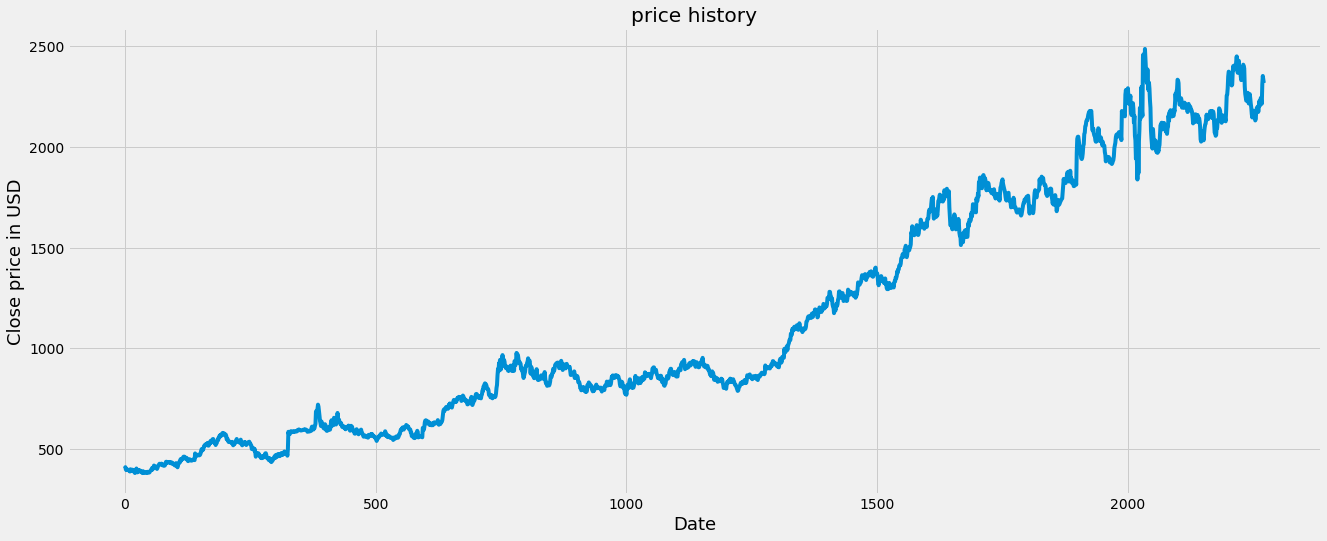

In [9]:
plt.figure(figsize=(20,8))
plt.title('price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price in USD',fontsize = 18)
plt.show()

In [10]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = df.filter(['Close'])
dataset = data.values
df1 = scaler.fit_transform(np.array(df["Close"]).reshape(-1,1))

['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [ ]:
df1

array([[0.01133211],
       [0.01396364],
       [0.0080368 ],
       ...,
       [0.93629829],
       [0.9287594 ],
       [0.91989287]])

In [ ]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1476, 796)

In [ ]:
len(train_data),len(test_data)

(1476, 796)

In [ ]:
import numpy
def create_dataset(dataset,time_step = 1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step  = 100
X_train ,Y_train = create_dataset(train_data,100)
X_test,Y_test = create_dataset(test_data,time_step)

In [ ]:
print(X_train.shape),print(Y_train.shape),print(X_test.shape) , print(Y_test.shape)

(1375, 100)
(1375,)
(695, 100)
(695,)


(None, None, None, None)

In [ ]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
22/22 [==============================] - 10s 249ms/step - loss: 0.0128 - val_loss: 0.0050
Epoch 2/100
22/22 [==============================] - 4s 200ms/step - loss: 0.0010 - val_loss: 0.0027
Epoch 3/100
22/22 [==============================] - 4s 200ms/step - loss: 3.0844e-04 - val_loss: 0.0019
Epoch 4/100
22/22 [==============================] - 4s 196ms/step - loss: 2.2924e-04 - val_loss: 0.0023
Epoch 5/100
22/22 [==============================] - 4s 194ms/step - loss: 2.5053e-04 - val_loss: 0.0022
Epoch 6/100
22/22 [==============================] - 4s 193ms/step - loss: 2.3464e-04 - val_loss: 0.0023
Epoch 7/100
22/22 [==============================] - 4s 192ms/step - loss: 2.3841e-04 - val_loss: 0.0019
Epoch 8/100
22/22 [==============================] - 4s 196ms/step - loss: 2.4692e-04 - val_loss: 0.0017
Epoch 9/100
22/22 [==============================] - 4s 195ms/step - loss: 2.5445e-04 - val_loss: 0.0018
Epoch 10/100
22/22 [==============================] - 4s 192ms

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

799.50123582695

In [ ]:
math.sqrt(mean_squared_error(Y_test,test_predict))

1966.2924802189264

In [ ]:
valid = data[training_size+101:]
valid["predictions"] = test_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


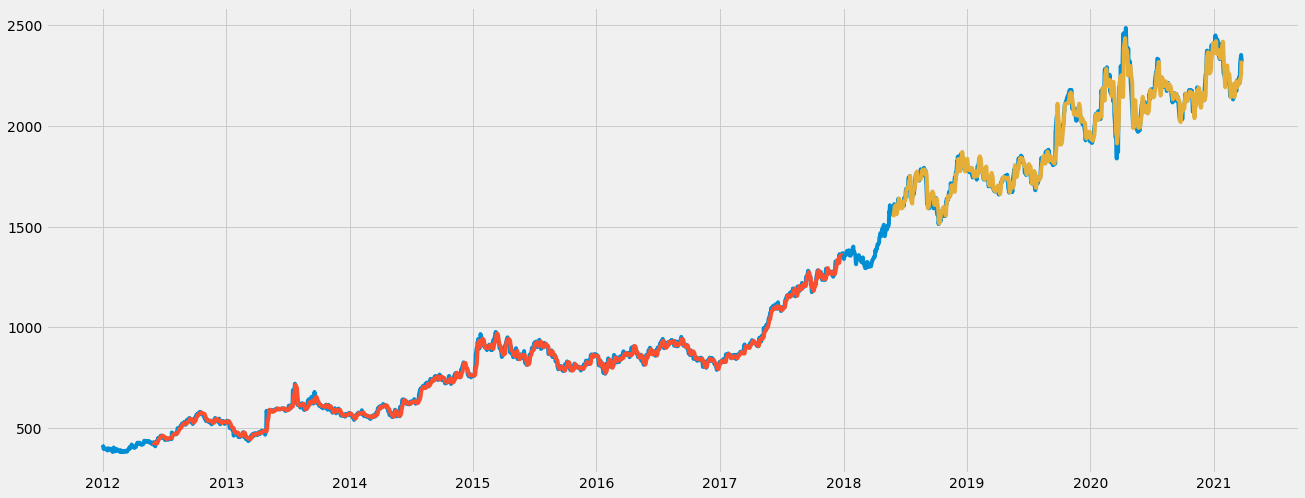

In [ ]:
look_back = 100
trainPredictplot = numpy.empty_like(df1)
trainPredictplot[:,:] = np.nan
trainPredictplot[look_back:len(train_predict) + look_back,:] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1:len(df1) -1 ,:] = test_predict
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,8))
plt.plot(df["Date"],scaler.inverse_transform(df1))
plt.plot(df["Date"],trainPredictplot)
plt.plot(df["Date"],testPredictPlot)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


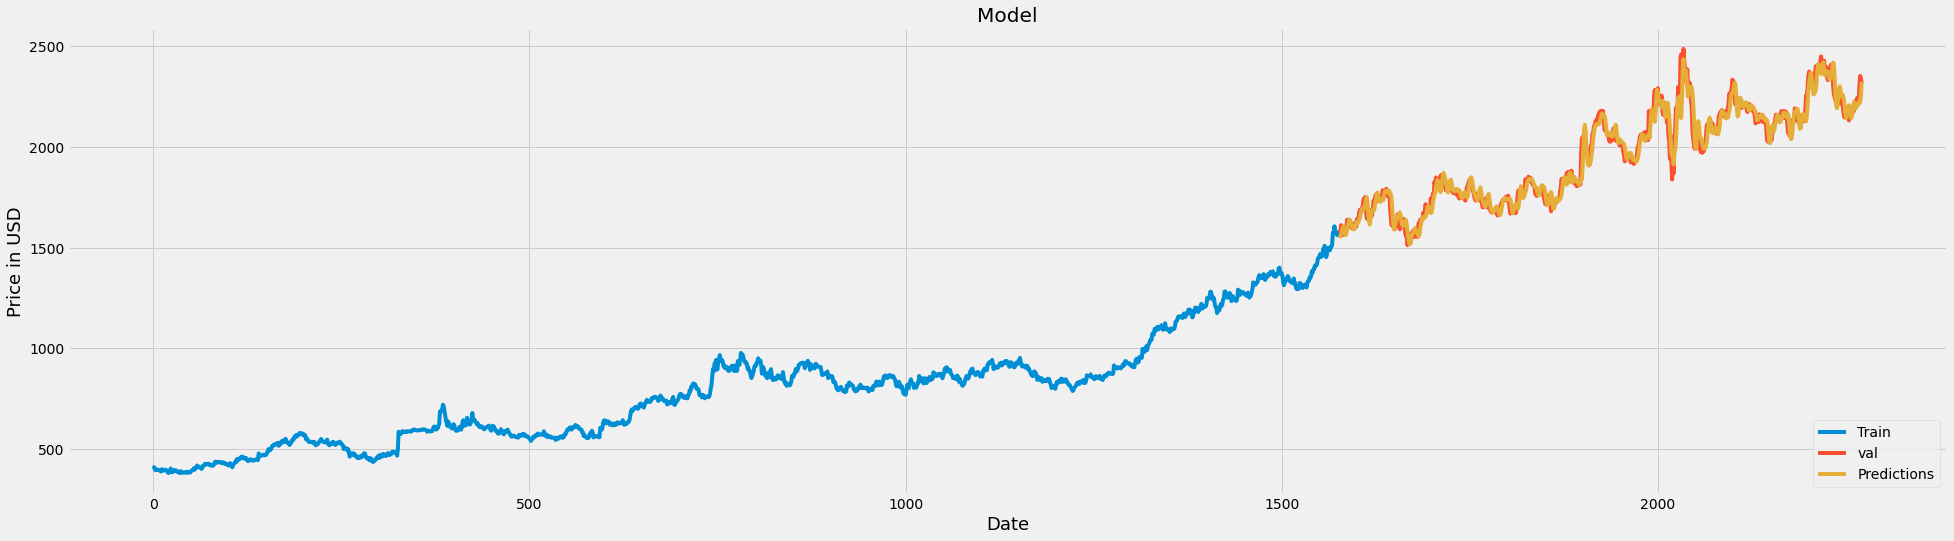

In [ ]:
train = data[:training_size+101]
valid = data[training_size+101:]
valid['Predictions'] = test_predict
plt.figure(figsize=(30,8))
plt.title('Model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Price in USD',fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','Predictions'],loc = 'lower right')
plt.show()

In [ ]:
trainer = data[:training_size]
plt.figure(figsize=(20,8))
valid = data[training_size:]

<Figure size 1440x576 with 0 Axes>

In [ ]:
train

,Close
0,402.399994
1,407.950012
2,395.450012
3,393.350006
4,396.799988
...,...
1572,1574.300049
1573,1568.099976
1574,1561.099976
1575,1575.750000


In [ ]:
len(test_data)

796

In [ ]:
x_input = test_data [696:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output  = []
n_steps  = 100
i= 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} data input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,n_steps,1))
        ythat = model.predict(x_input,verbose=  0)
        print("{} day output {}".format(i,ythat))
        temp_input.extend(ythat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(ythat.tolist())
        i = i+1
    else:
        x_input = x_input.reshape((1,n_steps,1))
        ythat = model.predict(x_input,verbose = 0)
        print(ythat[0])
        temp_input.extend(ythat[0].tolist())
        print(len(temp_input))
        lst_output.extend(ythat.tolist())
        i = i + 1
print(lst_output)

    

[0.93341017]
101
1 data input [0.80263626 0.80296814 0.79523952 0.79730211 0.81735855 0.81347045
 0.83167777 0.83359809 0.8310139  0.85991326 0.85671276 0.85303812
 0.83146443 0.83082429 0.82584574 0.83018414 0.84343665 0.83324248
 0.84194301 0.83435666 0.83191485 0.83487827 0.82940184 0.85616743
 0.89028229 0.8921078  0.90737531 0.93499438 0.94651618 0.94461959
 0.92058036 0.93191243 0.91832816 0.92693388 0.91389484 0.9162893
 0.94442998 0.95955523 0.95322532 0.95104431 0.96161781 0.95630727
 0.95258529 0.9710533  0.98245656 0.96669117 0.94371876 0.95431588
 0.97228612 0.9470614  0.94537828 0.95780091 0.93532626 0.92653093
 0.94101603 0.93760219 0.94314969 0.96292172 0.95829878 0.95436334
 0.9112633  0.89395693 0.88670257 0.87809673 0.87923475 0.88528013
 0.89663593 0.88103642 0.87136386 0.8804912  0.89353024 0.88335981
 0.87086599 0.86180985 0.84654222 0.8384581  0.85469764 0.84829665
 0.85382042 0.85363081 0.8462578  0.8314407  0.8368222  0.85320401
 0.86057702 0.86218907 0.86418058

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [ ]:
scaler.inverse_transform(lst_output)

In [ ]:
day_new

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

<Figure size 1440x576 with 0 Axes>

In [ ]:
len(df1)

2272

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

array([[2347.10875975],
       [2325.70488639],
       [2301.5833063 ],
       [2273.78649264],
       [2244.10906967],
       [2215.86586272],
       [2192.32820176],
       [2176.01643011],
       [2168.43239534],
       [2169.98377232],
       [2180.03132987],
       [2197.02695945],
       [2218.72763218],
       [2242.455114  ],
       [2265.39037658],
       [2284.883219  ],
       [2298.7470558 ],
       [2305.50643835],
       [2304.56160816],
       [2296.24732878],
       [2281.76537994],
       [2263.01233604],
       [2242.31620536],
       [2222.1298254 ],
       [2204.72614382],
       [2191.93096075],
       [2184.93951905],
       [2184.21769695],
       [2189.50062519],
       [2199.86471846]])

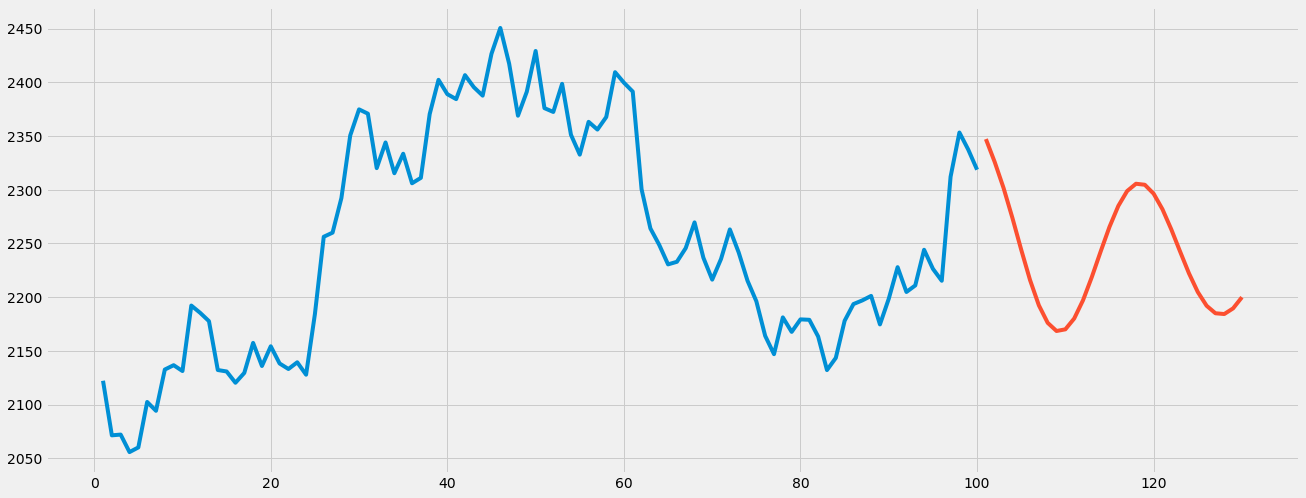

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(day_new,scaler.inverse_transform(df1[2172:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
scaler.inverse_transform(lst_output)

In [ ]:
data

,Close
0,402.399994
1,407.950012
2,395.450012
3,393.350006
4,396.799988
...,...
2267,2215.199951
2268,2312.050049
2269,2353.199951
2270,2337.300049


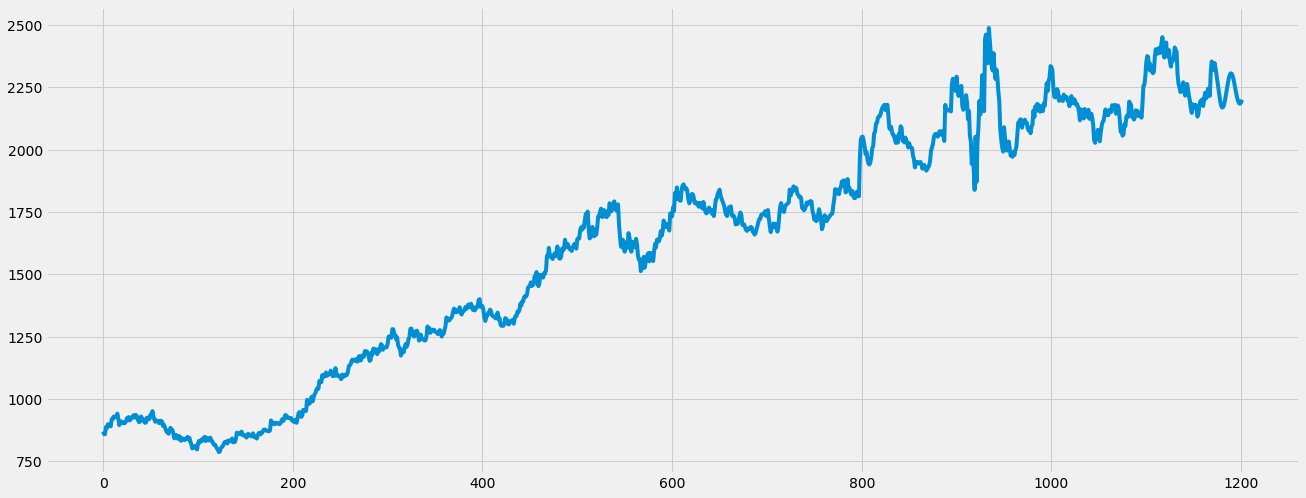

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(20,8))
plt.plot(scaler.inverse_transform(df3[1100:]))